In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [2]:
bikesData = pd.read_csv('/cxldata/datasets/project/bikes.csv')

In [3]:
print(bikesData.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [4]:
bikesData['yr']

0        0
1        0
2        0
3        0
4        0
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: yr, Length: 17379, dtype: int64

In [5]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# 1.0.4  Data cleaning
1.0.4  Data cleaning
As we observe, some of the attributes are not required as per the requirement of the project: ['instant','casual','registered','atemp','dteday']. These can be dropped.

Some of the numerical columns will have to be scaled: ['temp','hum','windspeed']

In [6]:
# Task 1: Update the columnsToDrop variable in the order given
columnsToDrop = ['instant','casual','registered','atemp','dteday']

# Task 2
bikesData = bikesData.drop(columnsToDrop, axis=1)

In [7]:
# Task 3: Update the columnsToScale variable in the order given
columnsToScale = ['temp','hum','windspeed']
scaler = StandardScaler()
# Task 4
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [8]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24
bikesData['dayCount']

0          0.000000
1          0.041667
2          0.083333
3          0.125000
4          0.166667
            ...    
17374    723.916667
17375    723.958333
17376    724.000000
17377    724.041667
17378    724.083333
Name: dayCount, Length: 17379, dtype: float64

# 1.0.7  Dividing the dataset into training and test datase

In [9]:
from sklearn.model_selection import train_test_split
# Task: Correct the train_test_split function to split the test set in the ratio 70:30
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())    
    
    
    

# 1.0.8  Training and analyze models

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

trainingCols = train_set.drop(['cnt'], axis=1)
trainingLabels = train_set['cnt']

In [12]:
 # Train a Decision Tree Regressor
    
dec_reg = DecisionTreeRegressor(random_state = 42)

dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(dt_mae_scores)

dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(dt_mse_scores)

Scores: [42.79622021 50.31963846 37.03615448 44.15365653 47.07723911 72.03782895
 58.36019737 48.22615132 50.94407895 96.88898026]
Mean: 54.78401456342171
Standard deviation: 16.70953413912157
Scores: [ 65.10279464  77.670527    60.59989749  73.66268699  75.76702279
 113.26870416  96.665763    81.28550338  86.87354694 149.4085296 ]
Mean: 88.03049759858746
Standard deviation: 25.035783082114


In [13]:
# Train a Linear Regression model

lin_reg = LinearRegression()

lr_mae_scores  = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(lr_mae_scores)

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(lr_mse_scores)


Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942213
Standard deviation: 31.426965705295686
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181748
Standard deviation: 37.55565075919563


In [14]:
# Let's train one more model using Random Forests

forest_reg = RandomForestRegressor(n_estimators=40, random_state=42)

rf_mae_scores  = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(rf_mse_scores)

Scores: [33.60078061 35.25895645 28.69693919 32.21612572 36.27419885 55.95324836
 41.52502056 40.8589227  38.56437089 85.53867187]
Mean: 42.848723519669264
Standard deviation: 15.86791088495905
Scores: [ 46.01102387  53.69005336  43.89129795  52.41113952  60.4974253
  91.08246111  67.29983865  65.66411628  63.73704551 133.99788938]
Mean: 67.82822909287472
Standard deviation: 25.458134412259643


# 1.0.10  Fine-tuning the model

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try combinations of hyperparameters
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

# Task 2
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [16]:
# Task 3
grid_search.fit(trainingCols, trainingLabels)
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [17]:
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [18]:
# See the importance score of each attribute in GridSearchCV
# Task 4
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


# 1.0.11  Evaluate the model on test dataset

In [19]:
final_model = grid_search.best_estimator_

test_set.sort_values('dayCount', axis= 0, inplace=True)

test_x_cols = (test_set.drop(['cnt'], axis=1)).columns.values

test_y_cols = 'cnt'

X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Task 3: Calculate the predicted values from the model and store it in 'predictedCounts_test'
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
# Task 4: Calculate the mean squared error using mean_squared_error function.
final_mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
print(np.sqrt(final_mse))
type(final_mse)


39.50507676859462


numpy.float64

In [22]:
test_set.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.012980,-0.002944,0.012217,185.322785,360.850898,186.751803
std,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.993567,0.995428,1.006002,177.755171,207.769276,171.543539
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477205,-3.251166,-1.553889,1.000000,0.000000,1.526667
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.815304,-0.763143,-0.699689,41.000000,180.781250,50.420000
50%,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.015647,0.014364,0.031899,136.000000,362.375000,144.173333
75%,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.742729,0.791871,0.519896,277.000000,537.104167,274.643500
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.404630,1.932215,5.399871,977.000000,724.041667,906.280000


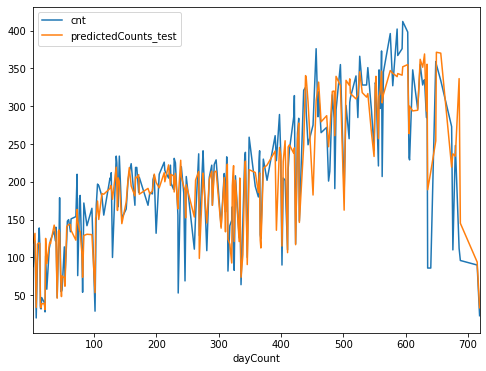

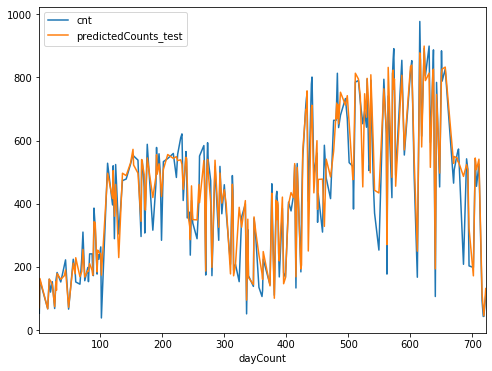

In [23]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()